# Renyi DP Calculations

In [1]:
import numpy as np
import jax
import jax.numpy as jnp
from sympy.solvers import solve
from sympy import Symbol
from matplotlib import pyplot as plt

## Intervals for DP guarantees

In [2]:
def compute_guarantee_interval(epsilon, alpha, pmx):
    x = Symbol('x')
    eq1 = (np.exp(-epsilon) * x) ** (alpha / (alpha - 1))
    eq2 = (np.exp(epsilon) * x) ** ((alpha - 1) / alpha)

    bot = solve(eq1 - pmx, x)
    top = solve(eq2 - pmx, x)

    return [bot, top]

def format_interval(interval, scientific=False) -> str:
    if scientific:
        return f"[{interval[0][0]:.4e}, {interval[1][0]:.4e}]"

    return f"[{interval[0][0]:.4f}, {interval[1][0]:.4f}]"

In [3]:
res = compute_guarantee_interval(epsilon=0.1, alpha=10.0, pmx=0.5)
print(format_interval(res))

[0.5922, 0.4189]


In [4]:
res = compute_guarantee_interval(epsilon=0.1, alpha=10.0, pmx=1e-6)
print(format_interval(res, scientific=True))

[4.3998e-6, 1.9494e-7]


## Plot epsilon over number of iterations

In [9]:
def basic_composition_bound(T: int, q: float, epsilon_i: float) -> np.ndarray:
    ts = np.arange(0, T)
    return q * epsilon_i * ts

def advanced_composition_bound(T: int, q: float, delta: float, epsilon_i: float) -> np.ndarray:
    ts = np.arange(0, T)
    return q * epsilon_i * np.sqrt(ts * np.log(1 / delta))

def renyi_composition_bound(T: int, q: float, epsilon_i: float) -> np.ndarray:
    ts = np.arange(0, T)
    return q * epsilon_i * np.sqrt(ts)

In [10]:
q = 0.01
sigma = 4
delta = 1e-5
T = 500
epsilon = np.sqrt(2 * np.log(1.25 / delta) / sigma)

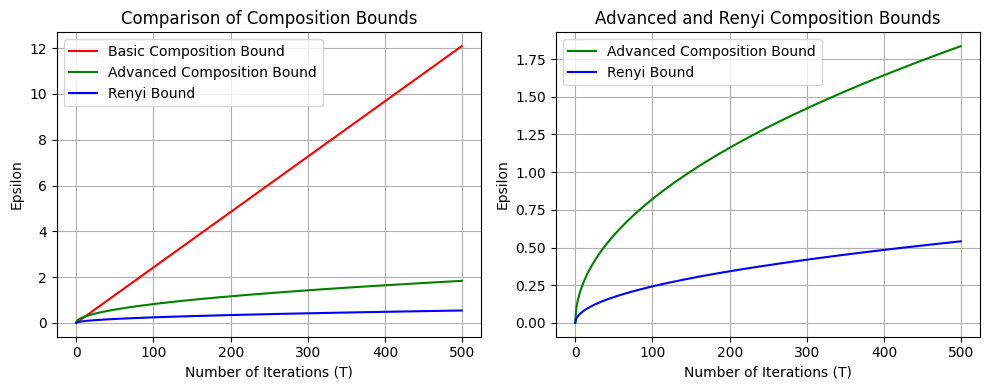

In [16]:
basic_bound = basic_composition_bound(T, q, epsilon)
advanced_bound = advanced_composition_bound(T, q, delta, epsilon)
renyi_bound = renyi_composition_bound(T, q, epsilon)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# First subplot with all three functions
ax1.plot(basic_bound, label='Basic Composition Bound', c='r')
ax1.plot(advanced_bound, label='Advanced Composition Bound', c='g')
ax1.plot(renyi_bound, label='Renyi Bound', c='b')
ax1.set_xlabel('Number of Iterations (T)')
ax1.set_ylabel('Epsilon')
ax1.set_title('Comparison of Composition Bounds')
ax1.legend()
ax1.grid(True)

# Second subplot with only advanced and renyi bounds
ax2.plot(advanced_bound, label='Advanced Composition Bound', c='g')
ax2.plot(renyi_bound, label='Renyi Bound', c='b')
ax2.set_xlabel('Number of Iterations (T)')
ax2.set_ylabel('Epsilon')
ax2.set_title('Advanced and Renyi Composition Bounds')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()